<a href="https://colab.research.google.com/github/Muskan2326/Deep_Learning_Models/blob/main/Building_a_Brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


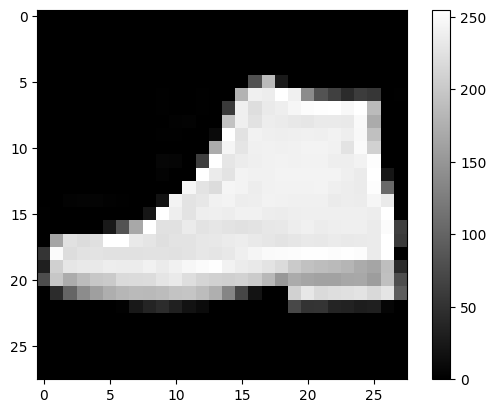

In [4]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_labels[data_idx]

np.uint8(9)

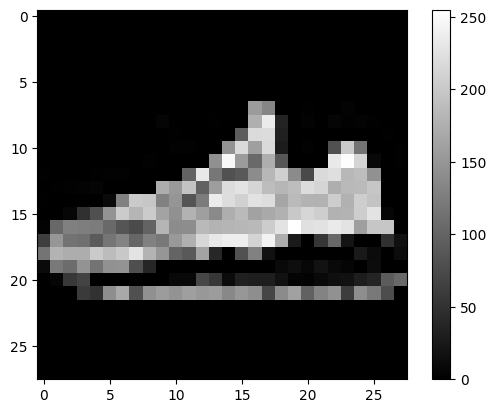

In [6]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
valid_labels[data_idx]

np.uint8(7)

Building a Neuron
Neurons are the fundamental building blocks to a neural network. Just like how biological neurons send an electrical impulse under specific stimuli, artificial neural networks similarly result in a numerical output with a given numerical input.

We can break down building a neuron into 3 steps:

Defining the architecture
Intiating training
Evaluating the model
Defining the architecture
Blausen 0657 MultipolarNeuron
Image courtesy of Wikimedia Commons

Biological neurons transmit information with a mechanism similar to Morse Code. It receives electrical signals through the dendrites, and under the right conditions, sends an electrical impulse down the axon and out through the terminals.

It is theorized the sequence and timing of these impulses play a large part of how information travels through the brain. Most artificial neural networks have yet to capture this timing aspect of biological neurons, and instead emulate the phenomenon with simpler mathematical formulas.

The Math
Computers are built with discrete 0s and 1s whereas humans and animals are built on more continuous building blocks. Because of this, some of the first neurons attempted to mimic biological neurons with a linear regression function: y = mx + b. The x is like information coming in through the dendrites and the y is like the output through the terminals. As the computer guesses more and more answers to the questions we present it, it will update its variables (m and b) to better fit the line to the data it has seen.

Neurons are often exposed to multivariate data. We're going to build a neuron that takes each pixel value (which is between 0 and 255), and assign it a weight, which is equivalent to our m. Data scientists often express this weight as w. For example, the first pixel will have a weight of w0, the second will have a weight of w1, and so on. Our full equation becomes y = w0x0 + w1x1 + w2x2 + ... + b.

Each image is 28 pixels by 28 pixels, so we will have a total of 784 weights. A pixel value of 0 would be black and a pixel value of 255 would be white. Let's look at the raw pixel values of the previous image we plotted. Each number below will be assigned a weight.

In [8]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 155, 133,   0,   0,   1,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,
          1,   0,   0, 175, 235,  35,   0,   3,   0,   5,   2,   3,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,  93, 219, 220,  32,   0,   0,   0,   0,   0,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   2,   0,
          0, 147, 218, 159, 218,  28,   0,   2,   0,  82, 202, 115,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,
        144, 248, 155, 105, 174,  87,   0,   0,   0, 233, 253, 213,   8,
          0,   1],
       [  1,   0,   0,   0,   1,   2,   2,   0,   0,   0,   0,  99, 233,
        119,  81,  89, 140, 183, 208, 139,  74, 218, 223, 184, 189, 145,
          0,   0],
       [  0,   1,   2,   3,   5,   0,   0,   0,   0, 173, 153, 195,  97,
        157, 220, 228, 213, 189, 182, 189, 220, 213, 174, 185, 186, 198,
          0,   0],
       [  1,   0,   0,   0,   0,  10, 129, 202, 198, 129, 149,  84, 124,
        236, 221, 209, 226, 221, 166, 186, 179, 178, 205, 177, 206, 196,
          0,   0],
       [  0,   0,   6,  49,  80, 148, 203, 181, 203, 164, 145, 178, 159,
        138, 174, 186, 162, 169, 177, 200, 214, 206, 178, 179, 205, 227,
          6,   0],
       [  3, 104, 128, 126, 124, 105,  85,  75,  99, 181, 140, 141, 185,
        179, 181, 183, 185, 204, 227, 255, 224, 226, 234, 227, 159, 198,
        198,   0],
       [ 62, 150, 115, 111,  91, 117, 131, 102, 129, 120, 153, 176, 216,
        232, 238, 238, 211, 242, 173,  26,   0,  54, 104,  20,   0,   0,
         48,  16],
       [116, 179, 173, 173, 202, 188, 200, 228, 179, 150, 100,  89, 164,
         39,   0,  82, 129,  17,   0,   0,   0,   0,   0,   0,  25,  11,
          0,  12],
       [ 10, 122, 108, 148, 115, 145, 148,  79,  38,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   9,  14,   7,  18,   9,   5,   0,  12,
          0,   0],
       [  0,   5,  57,  67,   0,   0,   0,   1,   0,   0,   8,   8,  71,
         55,  11,  32,  30,  30,  17,   4,   3,   9,  15,  17,  29,  37,
         92, 106],
       [  0,   0,   0,  58,  50, 142, 169,  80, 144, 156, 148, 159, 152,
        156, 136, 151, 142,  70, 139, 161,  98, 131, 145,  60, 141, 121,
         77,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [9]:
number_of_classes = train_labels.max() + 1
number_of_classes

np.uint8(10)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Verifying the model
To make sure our model has the structure we expect, we can call the summary method.

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

We can see that our total parameter count is 7850. For each pixel, there should be a weight for each of our ten classes.

In [13]:
image_height = 28
image_width = 28

# Convert number_of_classes to a standard Python int to avoid numpy uint8 overflow
number_of_weights = image_height * image_width * int(number_of_classes)
number_of_weights

7840

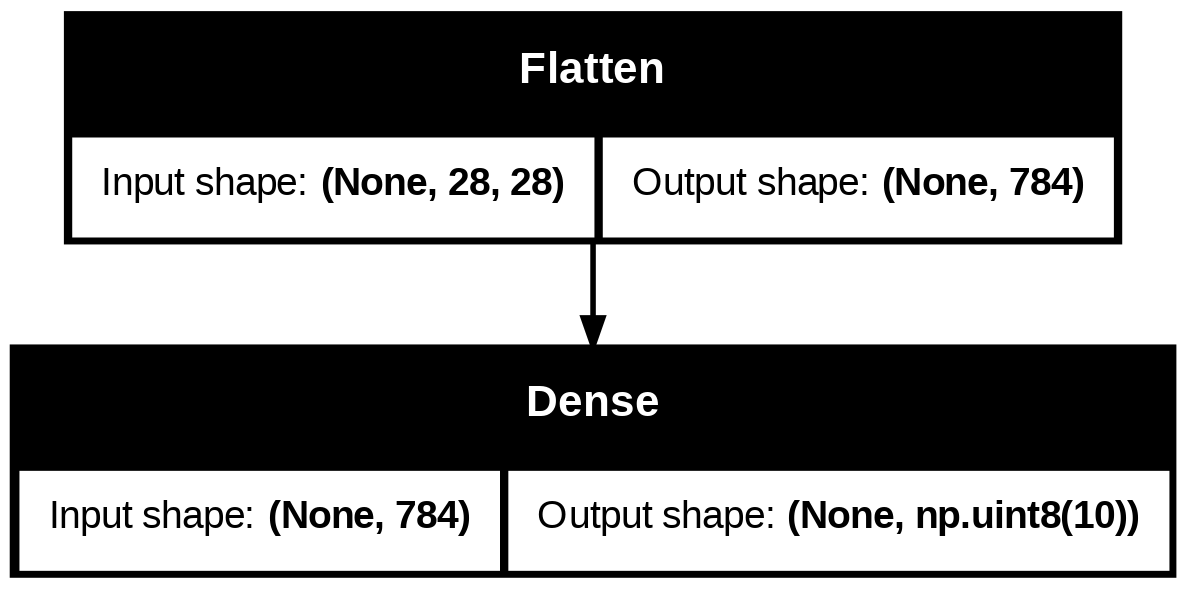

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

Initiating Training

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Evaluating The Model

In [16]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6874 - loss: 24.5058 - val_accuracy: 0.7852 - val_loss: 11.6693
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7850 - loss: 12.5844 - val_accuracy: 0.7757 - val_loss: 11.3866
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7955 - loss: 11.0894 - val_accuracy: 0.7751 - val_loss: 12.6131
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7984 - loss: 10.4753 - val_accuracy: 0.8117 - val_loss: 9.9001
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8060 - loss: 10.4087 - val_accuracy: 0.7297 - val_loss: 17.2144


In [17]:
model.predict(train_images[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[ -390.09534  ,  -635.6827   ,  -193.24121  ,  -200.70842  ,
         -308.4185   ,   519.7513   ,   -67.84897  ,   268.07858  ,
          125.87825  ,   788.1467   ],
       [  437.4651   ,  -242.10971  ,   431.16953  ,   151.43968  ,
           -8.197095 , -1084.9252   ,   342.1326   , -1861.2416   ,
           -6.2966766,  -629.34235  ],
       [  156.4766   ,    93.51325  ,   139.17532  ,   173.05571  ,
           86.59251  ,  -390.87335  ,   115.74324  ,  -507.06927  ,
          -39.41988  ,  -183.03036  ],
       [  268.26855  ,    97.19419  ,   299.88766  ,   298.21417  ,
          149.89778  ,  -579.3011   ,   261.97925  , -1057.5895   ,
          -67.09851  ,  -517.47076  ],
       [  306.38165  ,   265.4283   ,   271.9948   ,   344.08456  ,
          217.94629  ,  -715.25586  ,   215.49997  ,  -686.5915   ,
          124.72113  ,  -574.16583  ],
       [  237.73466  ,    35.731926 ,   518.4176   ,   268.1122   ,
          261.70645  ,  -594.38947  ,   299.29016  , -161

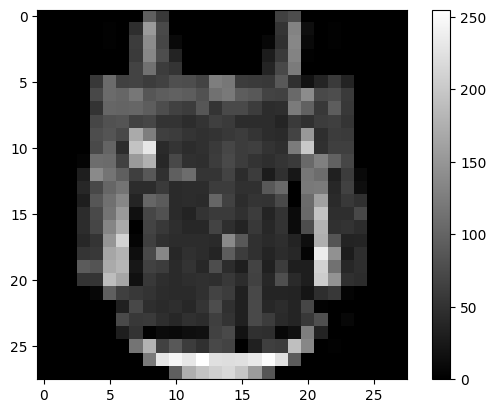

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


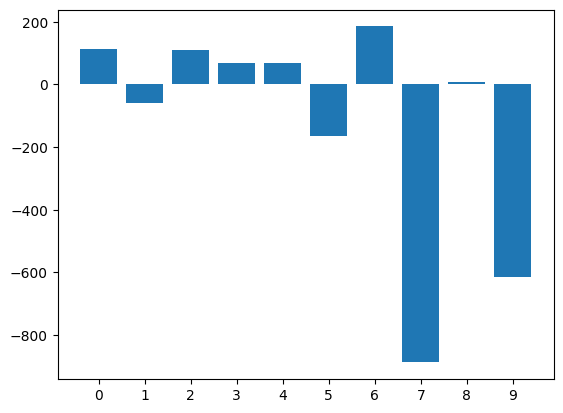

correct answer: 6


In [18]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])